# 기술 통계치(Descriptive Statistics)란?

* count, mean, standard dev, min, 1Q, median, 3Q, max 등의
데이터를 설명하는 값들

## 기술 통계치의 시각화
* barplot
* bagplot
* violin plot

etc

In [1]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


* Mean, Median, Mode
* Range
* Var / SD
* Kurtosis
* Skewness

# 추리 통계치(Inferential Statistics)란?

* Population
* Parameter
* Estimator
* Standard Deviation
* Standard Error

In [2]:
import numpy as np
v = np.random.randint(0, 100, 20)

pd.DataFrame(v).describe()

,0
count,20.000000
mean,54.700000
std,29.781838
min,2.000000
25%,37.500000
50%,55.500000
75%,82.250000
max,96.000000


In [3]:
np.arange(0,100, 1).mean()

49.5

# Effective Sampling

sampling 기법에는 여러가지 방법들이 있다.

1. Simple Random Sampling

  - 모집단에서 샘플링을 무작위로 하는 방법

2. Systematic Sampling

  - 모집단에서 샘플링을 할 때 규칙을 가지고 추출하는 방법

3. Stratified Random Sampling

  - 모집단을 미리 여러 그룹으로 나누고 그 그룹별로 무작위 추출을 수행하는 방법

4. Cluster Sampling

  - 모집단을 미리 여러 그룹으로 나누고 이후 특정 그룹을 무작위로 선택하는 방법

# 가설 검정
https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

* 주어진 상황에 대해서, 하고자 하는 주장이 맞는지 아닌지를 판정하는 과정
* 모집단의 실제 값에 대한 샘플의 통계치를 사용해서 통계적으로 유의한지 아닌지 여부를 판정함

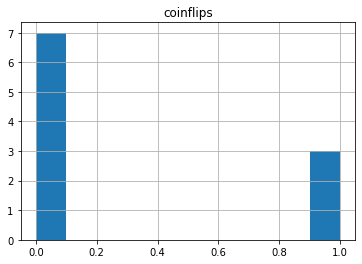

In [4]:
np.random.seed(1111) 

df = pd.DataFrame({'coinflips': np.random.binomial(n = 1, p = 0.5, size = 10)})

df.hist();

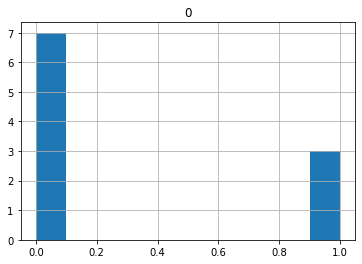

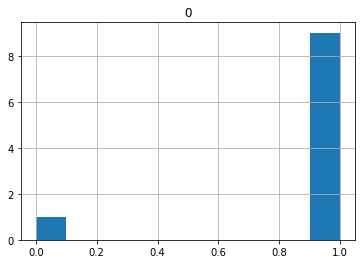

In [5]:
# 우연성에 따른 다른 결과

anotherCoin = np.random.binomial(n = 1, p = 0.5, size = 10)
anotherCoin2 = np.random.binomial(n = 1, p = 0.5, size = 10)

pd.DataFrame(anotherCoin).hist();
pd.DataFrame(anotherCoin2).hist();

### 샘플의 사이즈가 결과에 미치는 영향

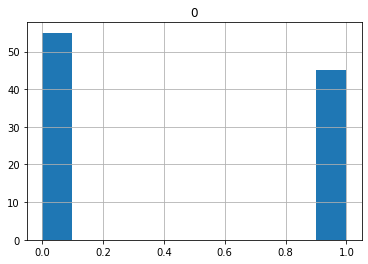

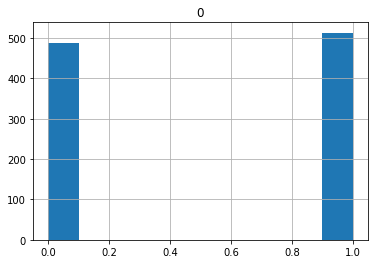

In [6]:
# 더 많은 정보 -> 무작위성을 고려하더라도 더 높은 신뢰성

pd.DataFrame(np.random.binomial(n = 1, p = 0.5, size = 100)).hist();
pd.DataFrame(np.random.binomial(n = 1, p = 0.5, size = 1000)).hist();

## 표본 평균의 표준 오차
표본의 수가 더욱 많아질수록, 추측은 더 정확해지고 높은 신뢰도를 바탕으로 모집단에 대해 예측할 수 있도록 함

# Student T-test


### One Sample t-test

1개의 sample 값들의 **평균**이 **특정값**과 동일한지 비교.

예) 동전이 공정한지 확인하려고 할때 : $p(x = H)$ = 0.5 

- 모집단에 대한 정보와 표본의 데이터를 비교 

- 정규화 과정을 거쳐 주어진 데이터가 평균은 0, 표준편차가 1인 데이터로 scaling이 된다.



In [8]:
coinflips = np.random.binomial(n = 1, p = 0.55, size = 10)
coinflips

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

### T-test Process

1) 귀무 가설 (Null Hypothesis) 를 설정 (fair coin, **p = 0.5**)

$H_0: \mu = \bar{x}$

$\mu =$ 모집단의 평균

$\bar{x} =$ 표본의 평균

2) 대안 가설 (Alternative Hypothesis) 를 설정 (not fair coin, **p != 0.5**)

$H_1: \mu \neq \bar{x}$

3) 신뢰도를 설정 (Confidence Level) : 모수가 신뢰구간 안에 포함될 확률 (보통 95, 99% 등을 사용)

> 신뢰도 95%의 의미 
> 
> = 모수가 신뢰 구간 안에 포함될 확률이 95%
>
> = 귀무가설이 틀렸지만 우연히 성립할 확률이 5%

<img src='https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1888/2017/05/11170654/3168.png' width = '400'>

4) P-value를 확인 

> P-value 는, 주어진 가설에 대해서 "얼마나 근거가 있는지"에 대한 값을
> 
> 0과 1사이의 값으로 scale한 **지표** 이며 
> 
> p-value가 낮다는 것은, 귀무가설이 틀렸을 확률이 높다.

예를 들어서 p-value가 0.05다. -> 우리가 뽑은 샘플 데이터로 낼 수 있는 결론이

귀무 가설이 (틀렸지만 우연히 맞을 확률) 확률이 0.05다 

: 귀무가설은 틀렸다

5) 이후 p-value를 바탕으로 가설에 대해 결론을 내림 

#### T-test with Scipy 

<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html>

### P-value의 기준

<https://en.wikipedia.org/wiki/P-value>

1) pvalue < 0.01 : 귀무가설이 옳을 확률이 1%이하 -> 틀렸다 (깐깐한 기준)
2) pvalue < 0.05 (5%) : 귀무가설이 옳을 확률이 5%이하 -> 틀렸다 (일반적인 기준)

2.5) 0.05 ~ pvalue ~ 0.1 사이인 경우: (애매함)

- 실험을 다시한다.
- 데이터를 다시 뽑는다.
- 샘플링을 다시한다
- 기존의 경험 / 인사이트를 바탕으로 가설에 대한 결론을 내린다.

3) pvalue > 0.1 (10%) : 귀무가설이 옳을 확률이 10%이상인데 -> 귀무가설이 맞다 ~ 틀리지 않았을것이다 

ex) `p-value : 0.85` --> 귀무가설은 **틀리지 않았다.** (귀무가설이 옳다와 톤이 약간 다름)


In [9]:
np.random.seed(1111)

coinflips = np.random.binomial(n = 1, p = 0.5, size = 1000)

print(np.mean(coinflips))

0.509


이 데이터를 바탕으로 p = 0.5인지 에 대해서 가설 검정을 하고 싶다 ?

In [10]:
from scipy import stats

# ttest_1samp 함수의 파라미터 1) Sample 데이터, 2) 비교하려는 값

stats.ttest_1samp(coinflips, .5)

TtestResult(statistic=0.5690174909554405, pvalue=0.5694721717152109, df=999)

In [11]:
print(stats.ttest_1samp(np.random.binomial(n = 1, p = 0.6, size = 10), .5))
print(stats.ttest_1samp(np.random.binomial(n = 1, p = 0.6, size = 100), .5))
print(stats.ttest_1samp(np.random.binomial(n = 1, p = 0.6, size = 1000), .5))

TtestResult(statistic=1.309307341415954, pvalue=0.2228683501335202, df=9)
TtestResult(statistic=1.8207158484808839, pvalue=0.07167088885580167, df=99)
TtestResult(statistic=5.850173442627621, pvalue=6.650107077235999e-09, df=999)


**p-value가 (1-Confidence)보다 낮은 경우, 귀무가설을 기각하고 대안 가설을 채택함**

# One-side test vs Two-side test

Two side (tail / direction) test : 샘플 데이터의 평균이 "X"와 같다 / 같지 않다. 를 검정하는 내용

One side test : 샘플 데이터의 평균이 "X"보다 크다 혹은 작다 / 크지 않다 작지 않다. 를 검정하는 내용

### Two Sample T-test

2개의 sample 값들의 **평균**이 **서로** 동일한지 비교.

2개의 동전 (500원짜리 vs 100원짜리)을 여러번 던져서 p(H)의 평균이 유사한 지 

1) 귀무가설 : 두 확률은 같다 (차이가 없다).

$H_0: \bar{x}_1 = \bar{x}_2$

2) 대안가설 : 같지 않다

$H_1: \bar{x}_1 \neq \bar{x}_2$

3) 신뢰도 : 95%

In [12]:
np.random.seed(111)

coin1 = np.random.binomial(n = 1, p = 0.5, size = 500)
coin2 = np.random.binomial(n = 1, p = 0.5, size = 200)

print(np.mean(coin1))
print(np.mean(coin2))

stats.ttest_ind(coin1, coin2) 

0.476
0.5


Ttest_indResult(statistic=-0.5733615498088787, pvalue=0.5665845925197331)

In [13]:
np.random.seed(111)

coin1 = np.random.binomial(n = 1, p = 0.6, size = 500)
coin2 = np.random.binomial(n = 1, p = 0.5, size = 200)

print(np.mean(coin1))
print(np.mean(coin2))

stats.ttest_ind(coin1, coin2) 

0.604
0.5


Ttest_indResult(statistic=2.5217925052968604, pvalue=0.011897284906103034)

# T-test 연습



In [14]:
import pandas as pd

trees = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt', sep = '\t', skiprows = 1)

trees = trees.replace({'-':0})

print(trees.head())

     기간  자치구    노선수       수량     은행나무   양버즘나무    느티나무    왕벚나무 은단풍나무 메타세콰이어  \
0  2019  서울시  1,412  307,351  108,050  62,474  37,473  34,150   545  5,171   
1  2019  종로구     70    7,329    4,072   1,071     619     421     0      1   
2  2019   중구     48    8,250    3,640     162     460     289     0      0   
3  2019  용산구     39    7,835    4,444   1,422     373     262     0      0   
4  2019  성동구     38    8,120    1,090   2,401   1,975     602    29     48   

   ... 튜울립나무    칠엽수 포플러 느릅나무 살구나무    무궁화    소나무   목련    이팝나무      기타  
0  ...   948  1,533   7  504  234  2,374  4,539  378  20,088  20,112  
1  ...     0     17   0    0    0      0    239    0     711      29  
2  ...     7      0   0    0   21     46  2,162    0     470     817  
3  ...    13     16   0    0   39      0     51  126     198     780  
4  ...     0      1   3   59    0      0     53    0     709     646  

[5 rows x 24 columns]


In [15]:
tree1 = pd.to_numeric(trees['은행나무'].str.replace(',','')) # 은행나무 데이터
tree2 = pd.to_numeric(trees['느티나무'].str.replace(',','')) # 느티나무 데이터

print(tree1.head())
print(tree2.head())

0    108050
1      4072
2      3640
3      4444
4      1090
Name: 은행나무, dtype: int64
0    37473
1      619
2      460
3      373
4     1975
Name: 느티나무, dtype: int64


#### 1-sample t-test : 은행나무의 평균

1) 같다

2) 같지 않다

3) 95%

4), 5) 생략

In [16]:
print(np.mean(tree1))

# P-value가 높다 라는 건 귀무가설이 옳을 가능성이 높다.

# 1-0.95 = 0.05 보다 작을때 귀무가설을 무시한다 라는 결론을 낼수 있다.

# 신뢰도를 99.999% 1-0.99999 ~ 0.000001 95% 혹은 99% 를 사용할거다 -> 귀무가설 판단의 기준이 p value 0.05 / 0.01이 기준이 될 것이다.

print(stats.ttest_1samp(tree1, 20000))
print(stats.ttest_1samp(tree1, 8000))
print(stats.ttest_1samp(tree1, 7800))
print(stats.ttest_1samp(tree1, 5000))
print(stats.ttest_1samp(tree1, 4000))

7717.857142857143
TtestResult(statistic=-3.284510872191696, pvalue=0.00282932249831876, df=27)
TtestResult(statistic=-0.07545110756125145, pvalue=0.9404120803789722, df=27)
TtestResult(statistic=-0.021966778150744045, pvalue=0.98263599594694, df=27)
TtestResult(statistic=0.7268138335963596, pvalue=0.47359495042209276, df=27)
TtestResult(statistic=0.9942354806488967, pvalue=0.3289356132079231, df=27)


#### 2-sample t-test : 은행나무 VS 느티나무

In [17]:
np.mean(tree2)

2676.6428571428573

In [18]:
stats.ttest_ind(tree1,tree2) 

Ttest_indResult(statistic=1.2730451277184196, pvalue=0.20845547747699233)

# One-Sample T-test 연습

In [19]:
import numpy as np
import pandas as pd
import scipy as sp

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt'

df = pd.read_csv(url, sep = "\t",  engine='python', encoding = "utf-8", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,기간,자치구,노선수,수량,종별,종별,종별,종별,종별,종별,...,종별,종별,종별,종별,종별,종별,종별,종별,종별,종별
1,기간,자치구,노선수,수량,은행나무,양버즘나무,느티나무,왕벚나무,은단풍나무,메타세콰이어,...,튜울립나무,칠엽수,포플러,느릅나무,살구나무,무궁화,소나무,목련,이팝나무,기타
2,2019,서울시,"1,412","307,351","108,050","62,474","37,473","34,150",545,"5,171",...,948,"1,533",7,504,234,"2,374","4,539",378,"20,088","20,112"
3,2019,종로구,70,"7,329","4,072","1,071",619,421,-,1,...,-,17,-,-,-,-,239,-,711,29
4,2019,중구,48,"8,250","3,640",162,460,289,-,-,...,7,-,-,-,21,46,"2,162",-,470,817


In [20]:
df2 = df.rename(columns=df.iloc[1])
df3 = df2.drop(df2.index[0])
df3 = df3.drop(df2.index[1])
df3 = df3.reset_index()
df4 = df3.drop(columns=['index'], axis = 1)
#df4

## "서울시에는 구별로 평균 약 400 그루 정도의 `이팝나무`가 있다"라는 가설에 대해 가설검정을 시행.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외.
- 가설검정 결과의 pvalue 값을 `pv1`에 저장. (`.pvalue` 사용)

In [21]:
data = df4.iloc[1:26]
#data

In [22]:
data = data.fillna(0)

In [23]:
def remove_comma(x):
  return x.replace(',', '')

for col in data:
  try: data[col] = pd.to_numeric(data[col].apply(remove_comma))
  except: continue

In [24]:
np.random.seed(1)
from scipy import stats

test1 = stats.ttest_1samp(data['이팝나무'], 400)
pv1 = test1.pvalue
pv1

0.002470712850935819

## 이번에는 10개의 구를 샘플링하여, 위에 대한 가설검정을 다시 한번 시행.

- 단, 아래의 코드를 참조하여 sample을 위한 seed 는 123로 설정.
- 가설검정 결과의 pvalue값을 `pv2`에 저장

In [26]:
import numpy as np
np.random.seed(123)

sample = np.random.choice(data['이팝나무'], size = 10)

In [27]:
test2 = stats.ttest_1samp(sample, 400)
pv2 = test2.pvalue
pv2

0.49772576203804575

# 2. Two-Sample T-test 연습

## "서울시의 구별 평균 느티나무수와 왕벚나무의 수는 차이가 없다"라는 가설에 대해 가설검정을 시행.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외.
- 가설검정 결과의 pvalue를 `pv3`에 저장

H0 : 차이가 없다

H1 : 차이가 있다

H0 : μ1 = μ2

H0 = 귀무가설

μ1 = 집단1의 평균

μ2 = 집단2의 평균

In [28]:
tree1 = data['느티나무']
tree2 = data['왕벚나무']

test3 = stats.ttest_ind(tree1, tree2)
pv3 = test3.pvalue
pv3

0.6455096880085703

p-value가 크므로 두 집단의 평균에는 통계적으로 유의미한 차이가 없다

## Two-Sample One-tailed test를 사용하여 **평균 느티나무수가 왕벚나무 수보다 크다**라는 가설에 대한 가설검정을 시행.
- 해당 가설검정의 결과를 `ans`에 저장.

이 때 `ans`가 가질 수 있는 값은 아래와 같다 :
1. "느티나무" ( 느티나무의 수가 통계적으로 유의하게 많은 경우 )
2. "왕벚나무" ( 왕벚나무의 수가 통계적으로 유의하게 많은 경우 )
3. "없음" (통계적으로 유의하지 않은 경우)

Two-Sample One-tailed test를 scipy에서 하는 방법은 아래의 링크를 참고  
참고 링크 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

less: The null hypothesis is that F(x) >= G(x) for all x; the alternative is that F(x) < G(x) for at least one x.

greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x.

H0 : 느티나무 <= 왕벚나무

H1 : 느티나무 > 왕벚나무

In [29]:
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
print(tree1.mean())
print(tree2.mean())

1415.12
1292.0


In [31]:
ans = stats.ttest_ind(tree1, tree2, alternative='greater')
ans

Ttest_indResult(statistic=0.4629256014492562, pvalue=0.32275484400428517)

In [32]:
ans = '없음'

검정결과 p-value가 0.32로 평균 느티나무수와 왕벚나무수는 통계적으로 유의미한 차이가 없다.

# 1. Compare mean for multiple-sample 
 
다음 링크를 참조. <https://reneshbedre.github.io/blog/anova.html>

구별, 은행나무, 양버즘나무, 느티나무에 대해서 ANOVA Test를 실행.

단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외.

In [33]:
fvalue, pvalue = stats.f_oneway(data['은행나무'],data['양버즘나무'],data['느티나무'])
print(fvalue, pvalue)

17.006289557888046 8.935183167883698e-07


p-value의 값이 충분히 작음으로 인해 그룹간 평균값이 통계적으로 유의미한 차이가 있다고 할 수 있다.

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [36]:
anova_tree = data[['은행나무', '양버즘나무', '느티나무']]

dt = anova_tree.melt()
dt

,variable,value
0,은행나무,4072
1,은행나무,3640
2,은행나무,4444
3,은행나무,1090
4,은행나무,1247
...,...,...
70,느티나무,185
71,느티나무,3409
72,느티나무,2991
73,느티나무,2400


In [37]:
model = ols('value ~ C(variable) ', data=dt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(variable),9.990817e+07,2.0,17.00629,8.935183e-07
Residual,2.114920e+08,72.0,NaN,NaN


PR(>F) 가 p-value. 값이 scipy로 실행한 결과값과 같다. 이 값이 0.005보다 작은 0에 가까운 수 이므로 세 집단 간 통계적으로 유의미한 차이가 있다.

구체적으로 어떠한 차이가 있는지 확인하려면 post hoc test(사후분석)이 요구된다.

## 2. Sampling

- 4가지 sampling (Simple Random, Systematic, Stratified Random, Cluster) 방식을 구현.

- 이를 위한 데이터는 1 부터 100을 담은 numpy array이며, Sampling 해야 하는 수는 20개.

- Stratified Random Sampling을 위한 그룹을 나누는 기준은 1-10, 11-20, ... 과 같은 방식.

- Cluster Sampling에서 그룹을 나누는 기준은 5로 나눴을때의 나머지 값. (0,1,2,3,4)

In [38]:
num_list = np.linspace(1,100,100)
num_list

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

1. Simple Random

In [39]:
np.random.choice(num_list, size = 20, replace=False, p=None )

array([95., 87., 43., 82., 93., 89., 98., 14., 60., 83.,  9.,  6.,  1.,
       51., 71.,  5., 32., 99., 36., 45.])

2. Systematic

In [40]:
def systematic_sampling(arr, step):
  
  indexes = np.arange(0, len(arr), step=step)
  systematic_sample = arr[indexes]
  return systematic_sample

systematic_sampling(num_list, 5)

array([ 1.,  6., 11., 16., 21., 26., 31., 36., 41., 46., 51., 56., 61.,
       66., 71., 76., 81., 86., 91., 96.])

3. Stratified Random

In [41]:
def stratified_sampling(arr, n_samples, strat):

  stratifed_sample = []
  for i in range( int(len(arr)/strat) ):
    temp = arr[:strat]
    sub_sample = np.random.choice(temp, size = int(n_samples/strat), replace=False, p=None)
    for j in sub_sample:
      stratifed_sample.append(j)
    arr = arr[10:]

  return stratifed_sample

In [42]:
arr = stratified_sampling(num_list, 20, 10)
print(arr)

[8.0, 10.0, 12.0, 13.0, 24.0, 27.0, 35.0, 38.0, 43.0, 41.0, 56.0, 55.0, 61.0, 64.0, 75.0, 71.0, 81.0, 88.0, 92.0, 95.0]


4. Cluster

In [43]:
import random

group0 = []
group1 = []
group2 = []
group3 = []
group4 = []

cluster = [group0, group1, group2, group3, group4]

for i in num_list:
  num = i % 5
  if num == 0:
    group0.append(i)
  
  elif num == 1:
    group1.append(i)
  elif num == 2:
    group2.append(i)
  
  elif num == 3:
    group3.append(i)
  elif num == 4:
    group4.append(i)

print(random.choice(cluster))

[5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]
